## Import Libraries 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Import Datasets

In [20]:
# Import Training Data Set
df_train_1 = pd.read_csv(r'Data\Train\Data_illustrated_CSV.csv')

df_train_c2 = pd.read_csv(r'Data\Train\corridor_CSV\July22_14.csv')                  
df_train_c3 = pd.read_csv(r'Data\Train\corridor_CSV\July22_16.csv')  
df_train_c4 = pd.read_csv(r'Data\Train\corridor_CSV\July22_16.csv')                  
df_train_c5 = pd.read_csv(r'Data\Train\corridor_CSV\July22_18.csv')                  
df_train_c6 = pd.read_csv(r'Data\Train\corridor_CSV\July22_20.csv')                  

df_train_b1 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_2.csv')    
df_train_b2 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_4.csv')    
df_train_b3 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_7.csv')    
df_train_b4 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_8.csv')    
df_train_b5 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_9.csv')    
df_train_b6 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_17.csv')    
df_train_b7 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_18.csv')    

df_train_11 = pd.read_csv(r'Data\Train\special_CSV\Aug16_Box_special_1.csv')    

# create datasets
df_train_1.columns = df_train_c2.columns = df_train_c3.columns = df_train_c4.columns  = df_train_c5.columns
df_train_b1.columns = df_train_b2.columns = df_train_b3.columns = df_train_b4.columns = df_train_b5.columns = df_train_b6.columns

# ==============================================================================

# Import Testing Data Set
df_test_1 = pd.read_csv(r'Data\Test\Aug14_Box_g1.csv')
df_test_2 = pd.read_csv(r'Data\Test\Aug14_Box_g2.csv')
df_test_3 = pd.read_csv(r'Data\Test\Aug14_Box_3.csv')
df_test_4 = pd.read_csv(r'Data\Test\Aug14_Box_5.csv')
df_test_5 = pd.read_csv(r'Data\Test\Aug14_Box_11.csv')

df_test_6 = pd.read_csv(r'Data\Test\July22_22.csv')
df_test_7 = pd.read_csv(r'Data\Test\July22_33.csv')
df_test_8 = pd.read_csv(r'Data\Test\July22_66.csv')

# df_test_1.columns = df_test_2.columns =
df_test_3.columns = df_test_4.columns = df_test_5.columns
df_test_6.columns = df_test_7.columns = df_test_8.columns

# ==============================================================================

## Select Datasets

In [49]:
# possible training set
box_train = [df_train_b1, df_train_b2, df_train_b3, df_train_b4, df_train_b5, df_train_b6]
corridor_train = [df_train_1, df_train_c2, df_train_c3,df_train_c4,df_train_c5]

# possible test set
box_test = [df_test_3, df_test_4]
corridor_test =  [df_test_6, df_test_7]

# ==================================================
#                 Select Data Set
# ==================================================
df_train = box_train
df_test = box_test
# ==================================================
# ==================================================

## Training Data 

In [50]:

# Combine Training Set                 
df_training = pd.concat(df_train, axis=0, ignore_index=True)

# Shuffle Dataset
df_training = shuffle(df_training)

# Reduce Laser Data
laser_df = pd.DataFrame()
bins_sz = 15*4
bin_list = np.arange(0,1080,bins_sz)
for c in bin_list:    # loop every 40 columns
    laser_df[c/bins_sz] = df_training.iloc[:,c:c+bins_sz].astype(float).mean(axis=1)
laser_df.shape

# Extract Useful Features [laser, local goal, pose]
laser = np.array(laser_df)  
local_goal = np.array(df_training)[:,1084:1088]                  
pose = np.array(df_training)[:,1088:1092]                  
features = np.concatenate((laser,local_goal,pose), axis=1)

# Extract Predictions
cmd_vel = np.array(df_training)[:,1092:]    

# Initialize Training Set Inputs
X_training = features
y_training = cmd_vel
y_training_vel = cmd_vel[:,0:1]
y_training_ang = cmd_vel[:,1:]

# Print Training Input Shapes
print("==================================================================")
print(" laser features shape --> ", laser.shape)  
print(" total training features shape --> ", X_training.shape)  
print(" total training translation velocity predictions shape --> ", y_training_vel.shape)  
print(" total training angular velocity predictions shape --> ", y_training_ang.shape) 
print("==================================================================")

 laser features shape -->  (81769, 18)
 total training features shape -->  (81769, 26)
 total training translation velocity predictions shape -->  (81769, 1)
 total training angular velocity predictions shape -->  (81769, 1)


# Training / Validation Split

In [51]:

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

y_train_vel = y_train[:,0:1]
y_train_ang = y_train[:,1:]

y_val_vel = y_val[:,0:1]
y_val_ang = y_val[:,1:]

# Print Training Input Shapes
print("==================================================================")
print(" training features shape --> ", X_train.shape)  
print(" training translation velocity predictions shape --> ", y_train_vel.shape)  
print(" training angular velocity predictions shape --> ", y_train_ang.shape) 
print("==================================================================")
# Print Training Input Shapes
print(" validation features shape --> ", X_val.shape)  
print(" validation translation velocity predictions shape --> ", y_val_vel.shape)  
print(" validation angular velocity predictions shape --> ", y_val_ang.shape) 
print("==================================================================")

 training features shape -->  (61326, 26)
 training translation velocity predictions shape -->  (61326, 1)
 training angular velocity predictions shape -->  (61326, 1)
 validation features shape -->  (20443, 26)
 validation translation velocity predictions shape -->  (20443, 1)
 validation angular velocity predictions shape -->  (20443, 1)


# Testing Data

In [52]:
df_test = pd.concat(df_test, axis=0, ignore_index=True)

# Reduce Laser Data
laser_df_test = pd.DataFrame()
for c in bin_list:    # loop every 40 columns
    laser_df_test[c/bins_sz] = df_test.iloc[:,c:c+bins_sz].astype(float).mean(axis=1)
laser_df_test.shape
                  
# Extract Useful Features [laser, local goal, pose]
laser = np.array(laser_df_test)  
local_goal = np.array(df_test)[:,1084:1088]                  
pose = np.array(df_test)[:,1088:1092]                  
features = np.concatenate((laser,local_goal,pose), axis=1)

# Extract Predictions
cmd_vel = np.array(df_test)[:,1092:]  

# Initialize Testing Set Inputs
X_test = features
y_test = cmd_vel
y_test_vel = cmd_vel[:,0:1]
y_test_ang = cmd_vel[:,1:]

# Print Testing Input Shapes
print("==================================================================")
print(" test features shape --> ", X_test.shape)  
print(" test translation velocity predictions shape --> ", y_test_vel.shape)  
print(" test angular velocity predictions shape --> ", y_test_ang.shape) 
print("==================================================================")


 test features shape -->  (26358, 26)
 test translation velocity predictions shape -->  (26358, 1)
 test angular velocity predictions shape -->  (26358, 1)


## Scale Training and Testing Data

In [61]:
scale = StandardScaler()
scale.fit(X_train)

x_train_scaled = scale.transform(X_train)
x_test_scaled =  scale.transform(X_test)
x_val_scaled =  scale.transform(X_val)


# Comment out to predict v and w together
y_train = y_train_vel
y_test = y_test_vel
y_val = y_val_vel 

# Comment out to predict v and w together
# y_train = y_train_ang
# y_test = y_test_ang
# y_val = y_val_ang 

# XG Boost (Extreme Gradient Boosting))

In [62]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

### Train Model 

In [63]:
# Classifier Name --> xgb_r
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_r.fit(x_train_scaled, y_train)

# Predicton
xg_pred_train = xgb_r.predict(x_train_scaled)
xg_pred_test = xgb_r.predict(x_test_scaled)

# In Sample and Out of Sample Error [MSE and R^2]
print('MSE train: %.4f, test: %.4f' % (mean_squared_error(y_train, xg_pred_train), mean_squared_error(y_test, xg_pred_test)))
print('R^2 train: %.4f, test: %.4f' % (r2_score(y_train, xg_pred_train), r2_score(y_test, xg_pred_test)))

xgb_r.get_params()


[19:35:20] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
MSE train: 0.0281, test: 0.0474
R^2 train: 0.7639, test: 0.6038


{'objective': 'reg:linear',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 10,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'seed': 123}

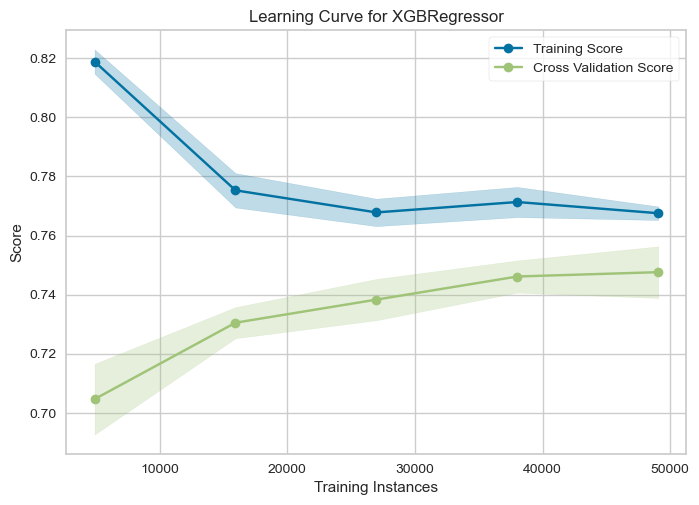

<AxesSubplot:title={'center':'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [64]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Instantiate the regression model and visualizer
visualizer = LearningCurve(xgb_r, scoring='r2')

visualizer.fit(x_train_scaled, y_train_vel.ravel())        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

### Tune parameters 

In [65]:
# parameter dictionary

# params = {
#     "learning_rate" : [0.3, 0.325, 0.35],
#     "max_depth" : [4,5,6,7],
#     "n_estimators": [8,10,12],
# }

params = {"max_depth" : [ 4,6,8,10,25],
        "n_estimators": [2,4,6,8,10,12,20],
        "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30, 0.40, 0.50]
        }

In [66]:
best_xgbr = RandomizedSearchCV(estimator=xgb_r, param_distributions=params, n_jobs=-1, cv=5, scoring='r2')
best_xgbr.fit(x_val_scaled, y_val.ravel())
print(" ")


[19:35:30] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
 


In [67]:
print("best score:", best_xgbr.best_score_)
print("best_param:")
best_xgbr.best_params_

best score: 0.8264914889342977
best_param:


{'n_estimators': 20, 'max_depth': 8, 'learning_rate': 0.3}

In [68]:
# Prediction
y_pred_lr_train = best_xgbr.predict(x_train_scaled)
y_pred_lr_test = best_xgbr.predict(x_test_scaled)

# In Sample and Out of Sample Error [MSE and R^2]
print('MSE train: %.4f, test: %.4f' % (mean_squared_error(y_train, y_pred_lr_train), mean_squared_error(y_test, y_pred_lr_test)))
print('R^2 train: %.4f, test: %.4f' % (r2_score(y_train, y_pred_lr_train), r2_score(y_test, y_pred_lr_test)))

best_xgbr.get_params()


MSE train: 0.0190, test: 0.0470
R^2 train: 0.8402, test: 0.6070


{'cv': 5,
 'error_score': nan,
 'estimator__objective': 'reg:linear',
 'estimator__base_score': 0.5,
 'estimator__booster': 'gbtree',
 'estimator__colsample_bylevel': 1,
 'estimator__colsample_bynode': 1,
 'estimator__colsample_bytree': 1,
 'estimator__enable_categorical': False,
 'estimator__gamma': 0,
 'estimator__gpu_id': -1,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': '',
 'estimator__learning_rate': 0.300000012,
 'estimator__max_delta_step': 0,
 'estimator__max_depth': 6,
 'estimator__min_child_weight': 1,
 'estimator__missing': nan,
 'estimator__monotone_constraints': '()',
 'estimator__n_estimators': 10,
 'estimator__n_jobs': 16,
 'estimator__num_parallel_tree': 1,
 'estimator__predictor': 'auto',
 'estimator__random_state': 123,
 'estimator__reg_alpha': 0,
 'estimator__reg_lambda': 1,
 'estimator__scale_pos_weight': 1,
 'estimator__subsample': 1,
 'estimator__tree_method': 'exact',
 'estimator__validate_parameters': 1,
 'estimator__verbosity': No